# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
# Ensure necessory resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.reviews[[10]].to_list()

In [ ]:
import re

In [ ]:
df.reviews.str.split('|',expand =True)

In [ ]:
df[['Trip','Review']] =df.reviews.str.split('|',expand =True)

In [ ]:
df_copy= df.copy()

In [ ]:
df_copy.drop(columns ='reviews',inplace =True)

In [ ]:
df_copy.head()

In [ ]:
df.Trip.value_counts()

In [ ]:
df_copy.duplicated().sum()

In [ ]:
df_copy.isna().sum()

### Remove Puntuation and special characters

In [ ]:
df_copy['Trip'] = df_copy['Trip'].str.lower()

In [ ]:
df_copy['Review'] = df_copy['Review'].str.lower()

In [ ]:
df_copy['Review'] = df_copy['Review'].apply(lambda x:re.sub(r'[^a-zA-Z\s]','',x))
df_copy['Trip'] = df_copy['Trip'].apply(lambda x:re.sub(r'[^a-zA-Z\s]','',x))
df_copy.head()

### Tokenization

In [ ]:
df_copy['Trip'] = df_copy['Trip'].apply(word_tokenize)
df_copy['Review'] = df_copy['Review'].apply(word_tokenize)

### Remove stopwords


In [ ]:
stop_words = set(stopwords.words('english'))
df_copy['Review'] = df_copy['Review'].apply(lambda x: [word for word in x if word not in stop_words])

### Lematization

In [ ]:
lemmatizer = WordNetLemmatizer()
df_copy['Review'] = df_copy['Review'].apply(lambda x:[lemmatizer.lemmatize(word) for word in x])


### Join token back into a sentence

In [ ]:
df_copy['Review'] = df_copy['Review'].apply(lambda x:' '.join(x))

In [ ]:
df_copy['Trip'] = df_copy['Trip'].apply(lambda x:' '.join(x))

In [ ]:
df_copy.head()

### Save Cleaned data


In [ ]:
df_copy.to_csv('data/cleaned_BA_reviews.csv',index = False)

### Load cleaned Dataset 

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('data/cleaned_BA_reviews.csv')
df.head()

,Trip,Review
0,trip verified,terrible overall medium service flight delayed...
1,trip verified,london heathrow male new business class ba con...
2,not verified,good flight following equally good flight rome...
3,not verified,hour delay due late arrival incoming aircraft ...
4,trip verified,booked ba loganair dont representative manches...


In [14]:
# concatenate all reviews into one text
all_text = " ".join(df['Review'])

In [15]:
from collections import Counter

In [17]:
# Tokenize words
tokens = word_tokenize(all_text)

# Generate word frequnecy,top 20 words
word_freq = Counter(tokens)
common_words = word_freq.most_common(20)


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

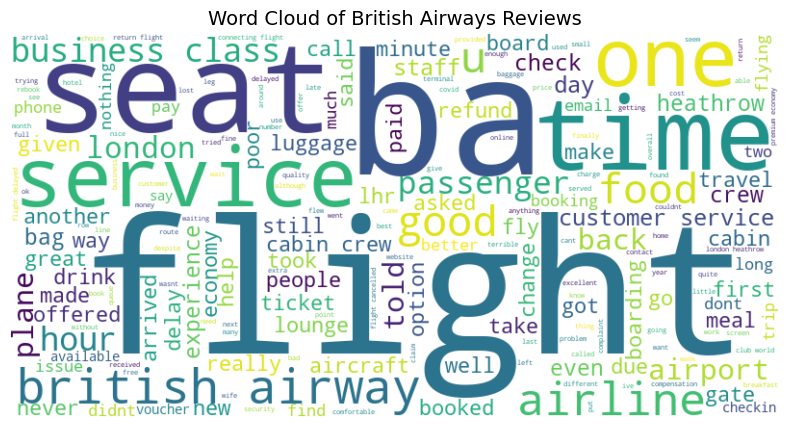

In [66]:
# Convert to DataFrame for visualization
word_df = pd.DataFrame(common_words,columns =['Word','Frequency'])

# ---Word Cloud ----
plt.figure(figsize=(10,5))
wordcloud = WordCloud(width=800,height = 400,background_color='white').generate(all_text)
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Reviews',fontsize =14)
plt.savefig('wordcloud.png',dpi = 300,bbox_inches ='tight')
plt.show()


C:\Users\UNIQUE\AppData\Local\Temp\ipykernel_8676\1401404750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency',y='Word',data =word_df,palette ='Blues_r')


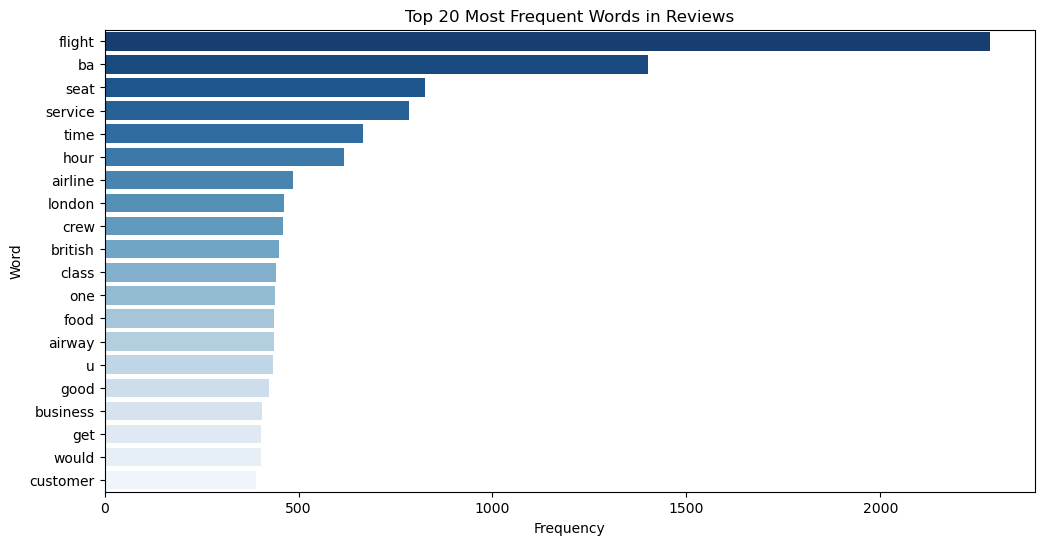

In [67]:
# --- Bar chart of most common words ---
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency',y='Word',data =word_df,palette ='Blues_r')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.savefig('topreviews.png',dpi=300,bbox_inches='tight')
plt.show()

## Sentiment Analaysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [23]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 960.0 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 812.7 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 812.7 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 416.7 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 450.6 kB/s eta 0:00:01
   -------------------------------------  122.9/126.0 kB 450.6 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 352.8 kB/s eta 0:00:00


In [24]:
df.columns

Index(['Trip', 'Review'], dtype='object')

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# funtion to call vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Review'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else :
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Trip,Review,Sentiement,Sentiment,Analysis
0,trip verified,terrible overall medium service flight delayed...,-0.4019,-0.4019,Negative
1,trip verified,london heathrow male new business class ba con...,0.9846,0.9846,Positive
2,not verified,good flight following equally good flight rome...,0.8271,0.8271,Positive
3,not verified,hour delay due late arrival incoming aircraft ...,0.8442,0.8442,Positive
4,trip verified,booked ba loganair dont representative manches...,0.1566,0.1566,Neutral


In [68]:
vader_counts =df['Analysis'].value_counts()
print(vader_counts.index)
print(vader_counts)

Index(['Negative', 'Positive', 'Neutral'], dtype='object', name='Analysis')
Analysis
Negative    453
Positive    445
Neutral     102
Name: count, dtype: int64


In [86]:
# sentiments percentage
100*vader_counts/sum(vader_counts)

Analysis
Negative    45.3
Positive    44.5
Neutral     10.2
Name: count, dtype: float64

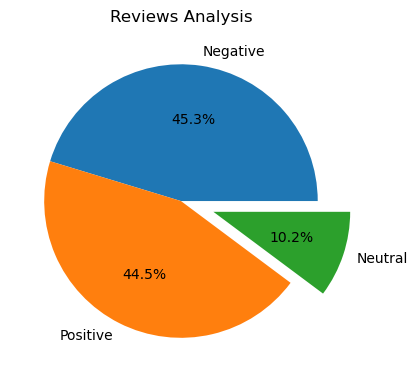

In [69]:
# pie chart of counts
plt.figure(figsize = (15,7))
plt.subplot(1,3,2)
plt.title('Reviews Analysis')
plt.pie(vader_counts.values,labels = vader_counts.index,explode = (0,0,0.25), autopct='%1.1f%%')
plt.savefig('piechart.png',dpi =300,bbox_inches='tight')
plt.show()

In [42]:
!pip install squarify

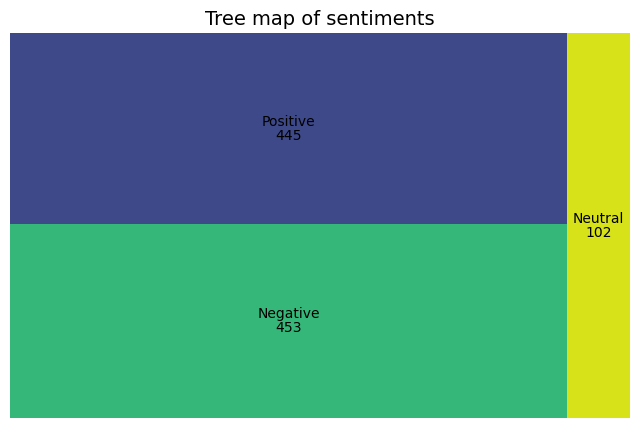

In [65]:
import squarify

# --- Tree Map ----
plt.figure(figsize =(8,5))
squarify.plot(sizes=vader_counts,label= vader_counts.index,value=vader_counts)
plt.axis('off')
plt.title('Tree map of sentiments',fontsize=14)
plt.show()